In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model_prediction import Replicator
from pneumococcus_data import data_observation
from subsystem import alpha_extract

In [2]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

country = np.array([Iran, Nepal, Brazil, Denmark, Mozambique], dtype = object)
mu_list = np.array([0.93, 3.95, 9.85, 10.23, 16.8])

big_alpha_Jan = np.loadtxt(open("big_alpha_Jan.txt","rb"), delimiter = ",", skiprows = 0)
big_alpha_May = np.loadtxt(open("big_alpha_May.txt","rb"), delimiter = ",", skiprows = 0)
big_alpha = [big_alpha_Jan, big_alpha_May]

name_country = np.array(['Iran', 'Nepal', 'Brazil', 'Denmark', 'Mozambique'])
abc = np.array([['a', 'b', 'c', 'd', 'e'], ['f', 'g', 'h', 'i', 'j']])
color = ['#1f77b4', '#FF5733']

In [3]:
#function calculate the symmetry level
def symm(A):
    n = len(A[0,:])
    
    #denominator
    d = 0
    for i in range (0, n):
        for j in range (0, n):
            if j != i:
                d = d + A[i,j]**2
    d = d/(n*(n-1))
    
    #numerator
    nr = 0
    for i in range (0, n):
        for j in range (i+1, n):
            nr = nr + A[i,j]*A[j,i]
    nr = 2*nr/(n*(n-1))
    
    return nr/d

Order 1: 
Iran
0.017172051914336087
Nepal
0.0030864291103621768


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Brazil
0.038403248049317204
Denmark
-0.01088937722164251


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mozambique
-0.04740812351038542
Order 2: 
Iran
-0.03482943339956805


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nepal
-0.18897087873326446


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Brazil
0.16467061577348707
Denmark
-0.0059385932956374


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mozambique
0.003354031814383656


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


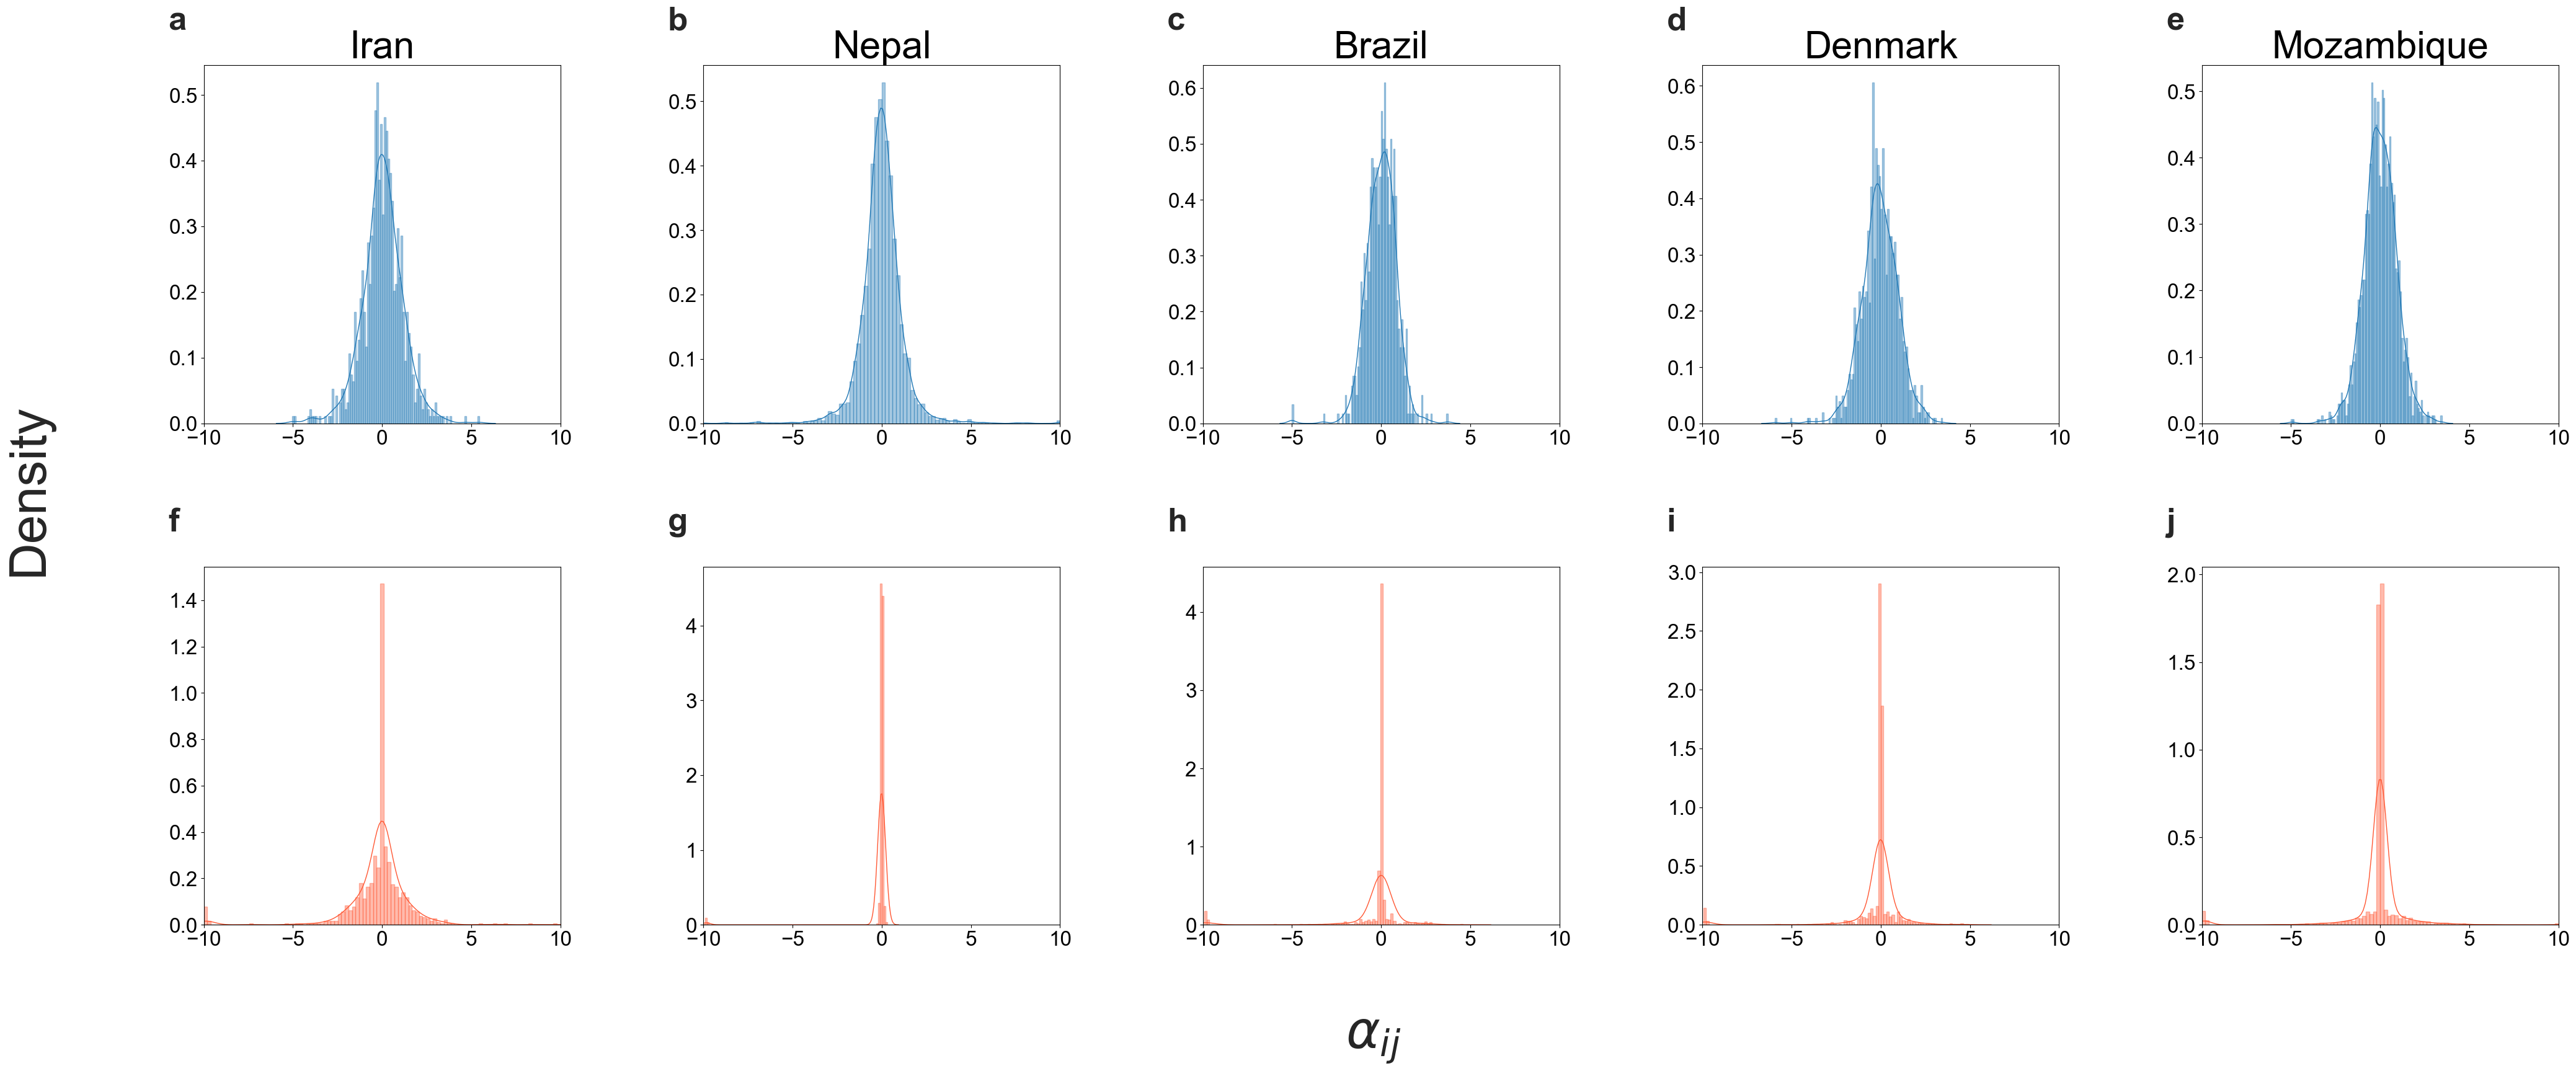

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(49, 18))
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

for i in range (0, 2):
    print(f'Order {i+1}: ')
    for j in range (0, 5):
        print(f'{name_country[j]}')
        
        #extract each country' strain and compute LL12 & LL21
        strain_list = np.array(country[j].strain)
        size = len(strain_list)
#        mu = mu_list[j]
        alpha = alpha_extract(strain_list, big_alpha[i])
    
        #calculate and print symmetry level of alpha matrix
        sym = symm(alpha)
        print(sym)
        
        vector_alpha = alpha.reshape(size**2)
        
        #plot distribution of alpha matrix
        sns.distplot(vector_alpha, ax = ax[i,j], hist=True, kde=True,
             bins = 100, color = color[i], 
             hist_kws = {'edgecolor':color[i]},
             kde_kws = {'linewidth': 1})
        sns.set(font_scale = 1.25)
        ax[i,j].set_xlim(-10, 10)
        ax[i,j].set(ylabel=None)
        ax[i,j].tick_params(axis='both', which='major', labelsize = 24)
        ax[i,j].text(-0.1, 1.1, '{}'.format(abc[i,j]), transform=ax[i,j].transAxes, size = 38, weight='bold')

for j in range (0, 5):
    ax[0,j].set_title(f'{name_country[j]}', fontsize = 44)

fig.text(0.51, 0, '$\\alpha_{ij}$', fontsize = 60, ha='center')
fig.text(0.06, 0.5, 'Density', fontsize = 60, va='center', rotation='vertical')
plt.show()

In [5]:
fig.savefig('alpha_distribution_all_countries.png', dpi=300, bbox_inches='tight')

In [6]:
#function compute Lambda matrix with a strain list given
def compute_lambda(strain_list, big_alpha):
    #extract data for each country
    strain_number = len(strain_list)
    
    #initial values
    u0 = (1/strain_number)*np.ones(strain_number)
    
    #extract alpha matrix from big alpha
    alpha_matrix = alpha_extract(strain_list, big_alpha)
    
    #compute fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]
            
    return lambd

Order 1: 
Iran
-0.6055934569480306


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nepal
-0.9551775776705931


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Brazil
-0.9906644136207826
Denmark
-0.9928610563988948


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mozambique
-0.99685131666775


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Order 2: 
Iran
0.3389104960161522
Nepal


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9969926226954644


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Brazil
-0.12237886325853092
Denmark
-0.34224319388946395


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mozambique
-0.7945472524853906


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


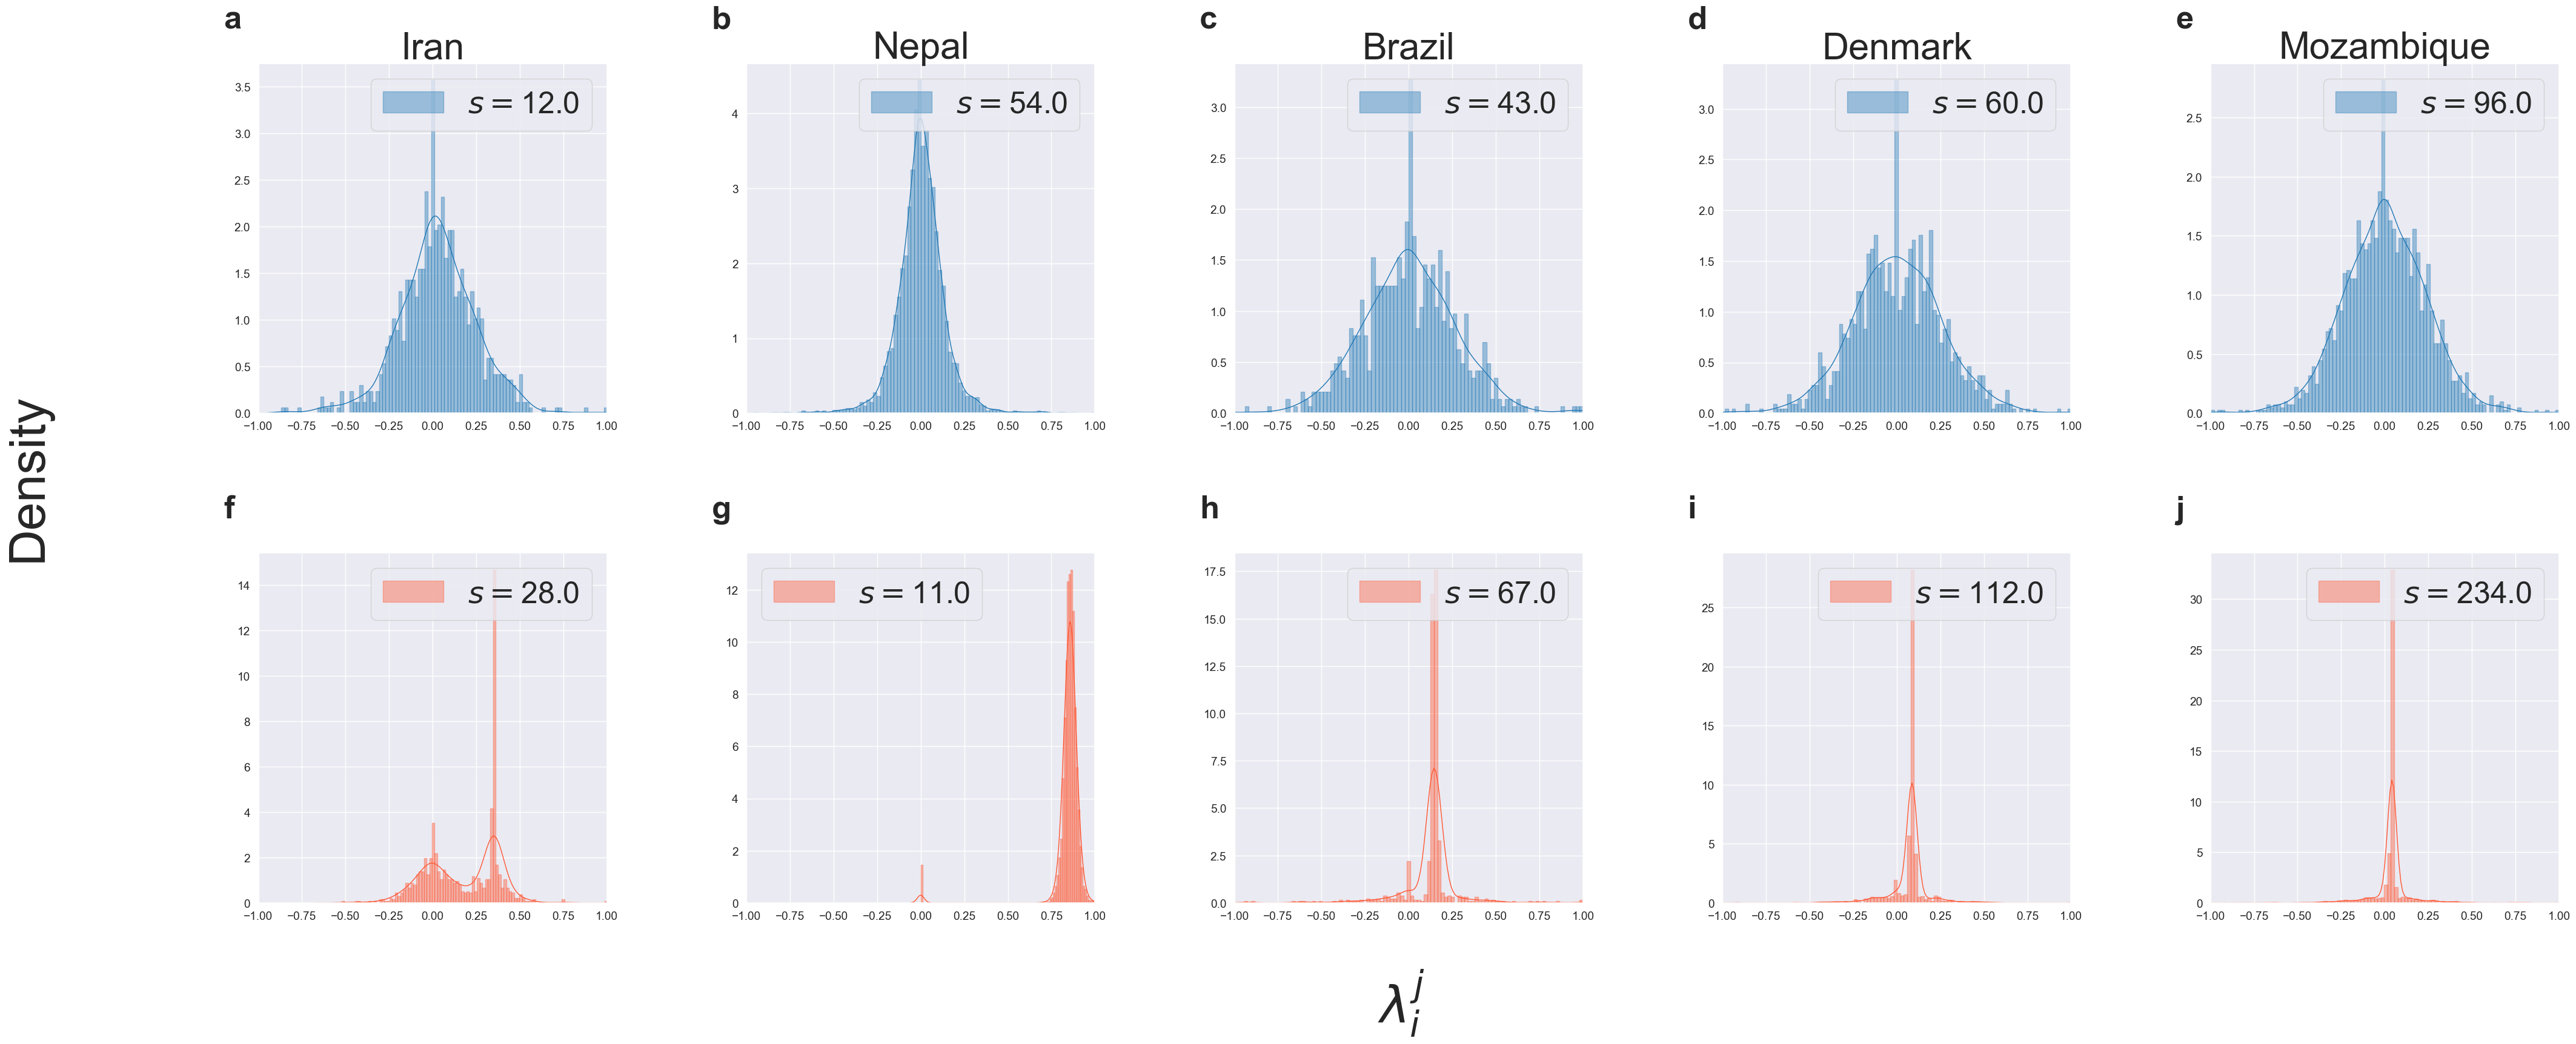

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(49, 18))
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

for i in range (0, 2):
    print(f'Order {i+1}: ')
    
    for j in range (0, 5):
        print(f'{name_country[j]}')

        #extract each country' strain and compute LL12 & LL21
        strain_list = np.array(country[j].strain)
        size = len(strain_list)
        mu = mu_list[j]
        lambd = compute_lambda(strain_list, big_alpha[i])     
        
        #calculate and print symmetry level of alpha matrix
        sym = symm(lambd)
        print(sym)

        vector_lambd = lambd.reshape(size**2)
        maxi = np.max(vector_lambd)
        
        #plot distribution of alpha matrix
        sns.distplot(vector_lambd/maxi, ax = ax[i,j], hist=True, kde=True,
             bins = 100, color = color[i], 
             hist_kws = {'edgecolor':color[i]},
             kde_kws = {'linewidth': 1},
             label = f'$s = ${np.round(maxi,0)}')
        sns.set(font_scale = 1.25)
        ax[i,j].set_xlim(-1, 1)
        ax[i,j].set(ylabel=None)
        ax[i, j].legend(fontsize = 36)
        ax[i,j].text(-0.1, 1.1, '{}'.format(abc[i,j]), transform=ax[i,j].transAxes, size = 38, weight='bold')

for j in range (0, 5):
    ax[0,j].set_title(f'{name_country[j]}', fontsize = 44)

fig.text(0.51, 0, '$\\lambda_i^j$', fontsize = 60, ha='center')
fig.text(0.04, 0.5, 'Density', fontsize = 60, va='center', rotation='vertical')
plt.show()

In [8]:
fig.savefig('lambda_distribution_all_countries.png', dpi=600, bbox_inches='tight')